# Display the dataset. 
This is to make sure, the dataset is being read correctly and converted to other formats appropriately.


In [7]:
import datasets
from io import BytesIO
import PIL
from IPython.display import display, Image
import numpy as np

*display_img_array* function: This is used to create a temporary file type object to be passed to IPython diplay module. 
Caveat here is, we can't display gray images!

In [2]:
def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

Load the color dataset to x and gray scale images to y

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
x=datasets.load_cifar()
y=datasets.load_cifar_gray()

Labeles used in CIFAR-10 dataset. Taken directly from input dataset.

In [39]:
labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Display 10 color images. (With their classes information)

Class: airplane


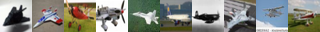

Class: automobile


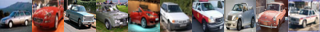

Class: bird


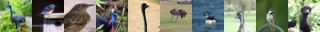

Class: cat


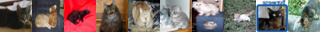

Class: deer


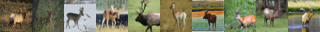

Class: dog


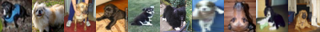

Class: frog


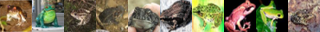

Class: horse


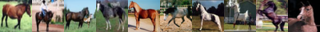

Class: ship


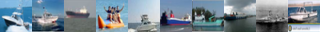

Class: truck


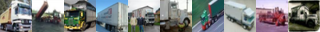

In [41]:
for i,name in enumerate(labels):
    imgs=x.X_train[x.y_train==i,:][0:10,:]
    img=np.rot90(imgs[0,:].reshape(32,32,3,order='F'),3)
    for j in range(1,10):
        img=np.hstack((img,np.rot90(imgs[j,:].reshape(32,32,3,order='F'),3)))
    print "Class:",name
    display_img_array(img)

Display 10 gray scale images. (with their classes information)

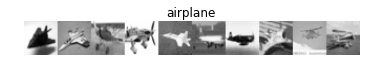

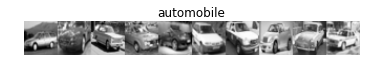

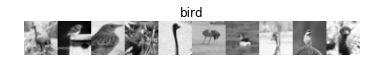

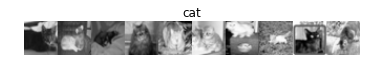

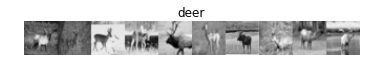

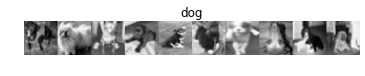

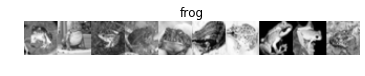

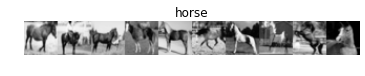

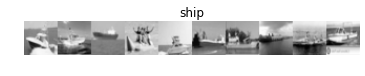

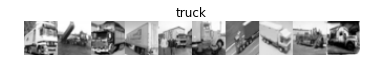

In [42]:
for i,name in enumerate(labels):
    imgs=y.X_train[y.y_train==i,:][0:10,:]
    img=np.fliplr(imgs[0,:].reshape(32,32))
    for j in range(1,10):
        img=np.hstack((img,np.fliplr(imgs[j,:].reshape(32,32))))
    plt.figure()
    plt.imshow(img, cmap = cm.Greys_r)
    plt.title(name)
    plt.axis('off')